# Estadistica Aplicada
## Jesus Adrian Cordero Hernandez
## 19y 23 de octubre

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [4]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import pmdarima as pm

In [5]:
plt.rcParams['figure.figsize']=(10,6)

In [6]:
df_amazon=pd.read_excel('amazon.xlsx')

In [7]:
df_amazon=df_amazon.set_index('fecha')
df_amazon=df_amazon.asfreq('B')

In [8]:
df_amazon.isnull().sum()

amazon    47
dtype: int64

In [9]:
df_amazon['amazon']=df_amazon['amazon'].fillna(method='pad')

ConversionError: Failed to convert value(s) to axis units: array([Period('2015-01-02', 'B'), Period('2015-01-05', 'B'),
       Period('2015-01-06', 'B'), ..., Period('2019-12-26', 'B'),
       Period('2019-12-27', 'B'), Period('2019-12-30', 'B')], dtype=object)

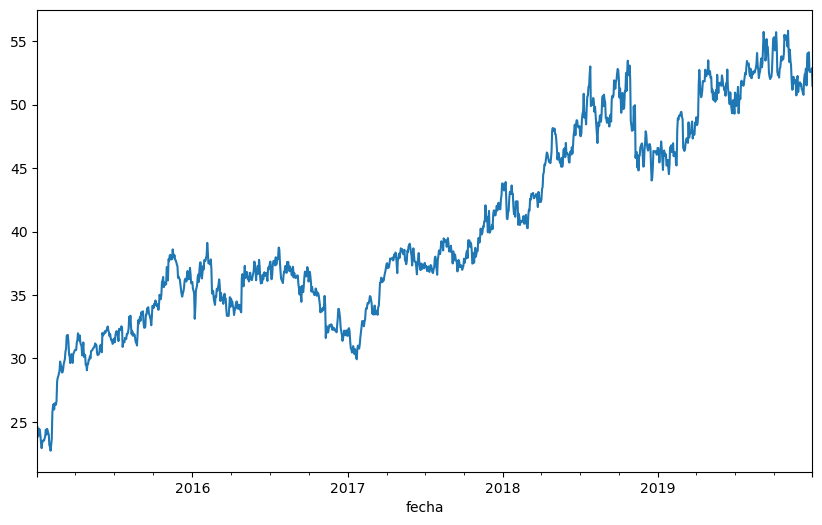

In [10]:
df_amazon['amazon'].plot()
plt.xlim('2015-01-01','2015-12-31');

In [11]:
df_amazon.tail(1)

,amazon
fecha,
2019-12-30,51.478008


In [12]:
#conservamos todas las obs menos la última
ult_obs=df_amazon.loc['2019-12-30']
#vamos a pronosticar la ultima observación y vamos a ver que tan cerca o lejos queda nuestro pronostico

In [13]:
# Prueba de dickey fuller aumentada
prueba_dfa=adfuller(df_amazon['amazon'])
pvalues=prueba_dfa[1]
pvalues.round(2)

0.51

No rechazamos H0, el precio de las accion de amazon son " no estacionaria "

In [14]:
df_amazon['amazon_diff']=df_amazon['amazon'].diff()

<Axes: xlabel='fecha'>

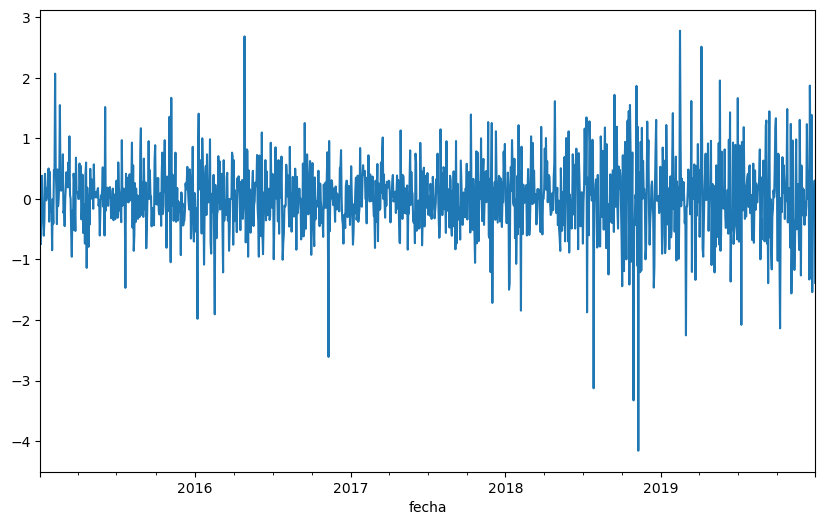

In [15]:
df_amazon['amazon_diff'].plot()

In [16]:
## prueba dickey fuller aumentada
prueba_dfa1=adfuller(df_amazon['amazon_diff'].dropna())
pvalue1=prueba_dfa1[1]
pvalue1.round(2)

0.0

Rechazamos H0, significa que las primeras diferencias de la acción de amazon son un proceso estacionario

c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


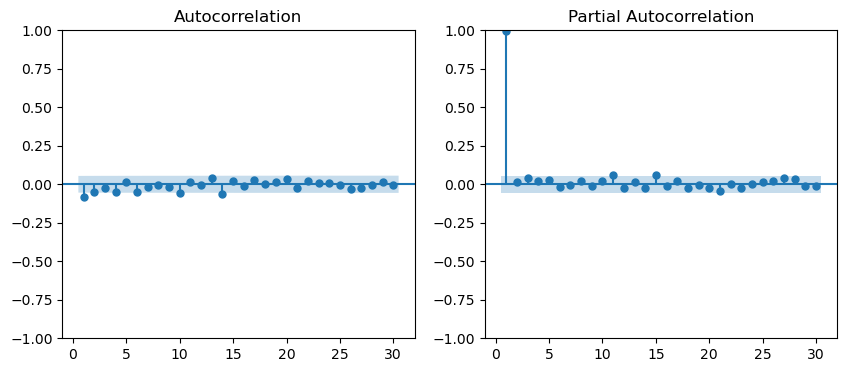

In [17]:
ig,ax=plt.subplots(1,2,figsize=(10,4))
plot_acf(df_amazon['amazon_diff'].dropna(),zero=False,lags=30,ax=ax[0])
plot_pacf(df_amazon['amazon'].dropna(),zero=False,lags=30,ax=ax[1])
plt.show()

In [18]:
ic = {}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(df_amazon['amazon_diff'].dropna(), order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]
 
ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 0, MA: 5
AR: 0, MA: 6
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3
AR: 1, MA: 4
AR: 1, MA: 5
AR: 1, MA: 6
AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2


c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 2, MA: 3
AR: 2, MA: 4
AR: 2, MA: 5
AR: 2, MA: 6
AR: 3, MA: 0
AR: 3, MA: 1
AR: 3, MA: 2


c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 3


c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 4


c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 5
AR: 3, MA: 6


c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2


c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 3


c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 4
AR: 4, MA: 5


c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 6


c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 0
AR: 5, MA: 1
AR: 5, MA: 2


c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 3
AR: 5, MA: 4


c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 5


c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 6


c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 0
AR: 6, MA: 1
AR: 6, MA: 2
AR: 6, MA: 3


c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 4


c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 5


c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 6


c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [19]:
ic.sort_values('AIC').head(1)

,,AIC,BIC
AR,MA,,
2,2,2376.844288,2407.869619


AIC
amazon_diff es un ARMA(1,1)=ARIMA(1,0,1)
amzon ARIMA(1,1,1)
BIC
amazon_diff es un ARMA(1,1)=ARIMA(1,0,1)
amzon ARIMA(1,1,1)

In [20]:
pm.auto_arima(df_amazon['amazon_diff'].dropna(),start_p=1,max_p=7, star_q=1,ic='bic', max_q=7,seasonal=False)

ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True)

In [21]:
pm.auto_arima(df_amazon['amazon'],start_p=1,max_p=7, star_q=1, max_q=7,seasonal=False)

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

In [22]:
#estimar el modelo
model=ARIMA(df_amazon['amazon'],order=(1,1,1))
results=model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                 amazon   No. Observations:                 1302
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1186.528
Date:                Mon, 23 Oct 2023   AIC                           2379.056
Time:                        15:05:41   BIC                           2394.569
Sample:                    01-02-2015   HQIC                          2384.876
                         - 12-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7517      0.071     10.587      0.000       0.613       0.891
ma.L1         -0.8391      0.058    -14.410      0.000      -0.953      -0.725
sigma2         0.3628      0.008     43.511      0.0

In [23]:
results.predict(start='2019-12-30',end='2020-01-05')

2019-12-30    52.847078
2019-12-31    51.584018
2020-01-01    51.663710
2020-01-02    51.723617
2020-01-03    51.768651
2020-01-06    51.802504
Freq: B, Name: predicted_mean, dtype: float64

In [24]:
df_amazon.tail()

,amazon,amazon_diff
fecha,,
2019-12-24,52.599163,0.009510
2019-12-25,52.599163,0.000000
2019-12-26,52.561153,-0.038010
2019-12-27,52.865196,0.304043
2019-12-30,51.478008,-1.387188


Pronosticamos que el día 30 de diciembre de 2019 el precio de la acción de amazon se encuntra en 52.84

ConversionError: Failed to convert value(s) to axis units: array([Period('2019-12-30', 'B'), Period('2019-12-31', 'B'),
       Period('2020-01-01', 'B'), Period('2020-01-02', 'B'),
       Period('2020-01-03', 'B'), Period('2020-01-06', 'B')], dtype=object)

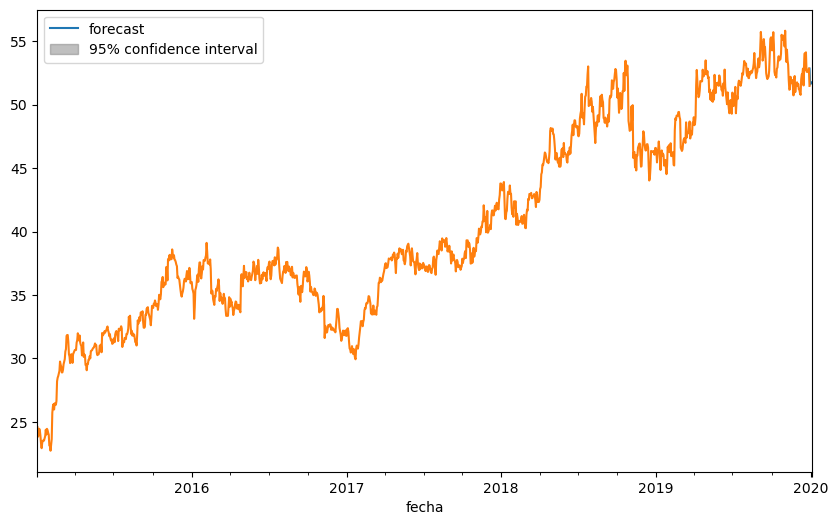

In [25]:
plot_predict(results,start='2019-12-30',end='2020-01-05')
df_amazon['amazon'].plot()
plt.xlim('2019-08-01','2020-01-05')
plt.ylim(50,57);